In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [2]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv", low_memory=False)
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos.columns = ["datetime", "country", "state", "latitude", "longitude"]
ufos = ufos[ufos.country == "us"]


In [6]:
# ufos.groupby("state").city.count().sort_values(ascending = False)

In [7]:
state_names = pd.read_csv("data/states.csv")


In [8]:
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
ufos.state.replace(state_names_dict, inplace = True)


In [9]:
ufos.head()

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,Texas,29.8830556,-97.941111
3,10/10/1956 21:00,us,Texas,28.9783333,-96.645833
4,10/10/1960 20:00,us,Hawaii,21.4180556,-157.803611
5,10/10/1961 19:00,us,Tennessee,36.5950000,-82.188889
7,10/10/1965 23:45,us,Connecticut,41.1175000,-73.408333


In [13]:
num_sightings_by_state = ufos.groupby("state").count().datetime


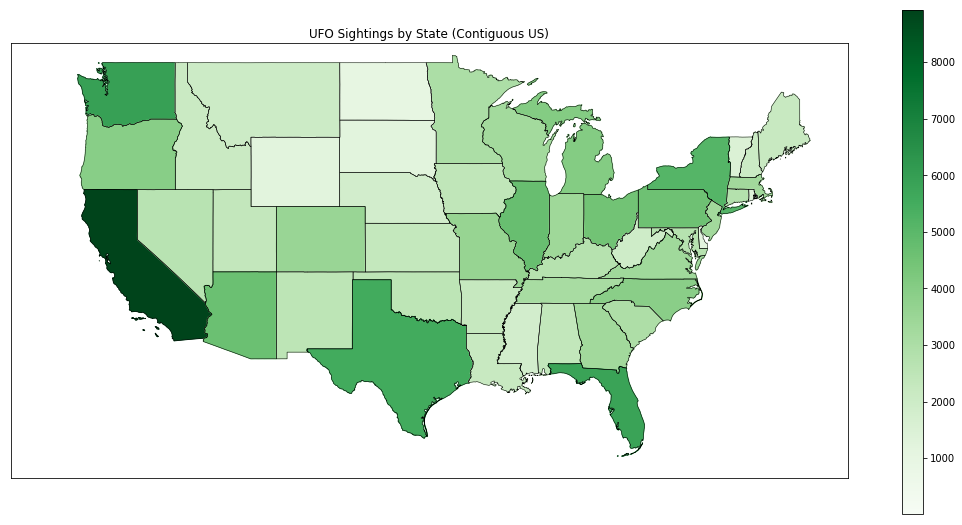

In [18]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23,  urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("data/st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

for shape_dict in m.states_info:
    state_name = shape_dict["NAME"] 
    if state_name not in ["District of Columbia", "Puerto Rico"]: # Skip DC and Puerto Rico
        sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
    state_names.append(state_name)
    ax = plt.gca()
for nshape, seg in enumerate(m.states):    
    if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]: # Skip DC and Puerto Rico
        color = rgb2hex(colors[state_names[nshape]])
        poly = Polygon(seg, facecolor = color, edgecolor = color)
        ax.add_patch(poly)

plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap, norm = matplotlib.colors.Normalize(vmin, vmax))

plt.show()
